In [ ]:
!pip install torchvision

ERROR: torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl is not a supported wheel on this platform.


## CIFAR10 Dataset Tutorial

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])#이미지를 Tensor로 변환해주는 기능

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


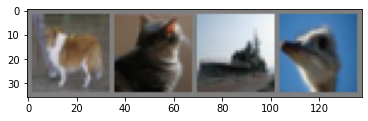

  dog   cat  ship  bird


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

Net(<br>
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))<br>
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)<br>
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))<br>
  (fc1): Linear(in_features=400, out_features=120, bias=True)<br>
  (fc2): Linear(in_features=120, out_features=84, bias=True)<br>
  (fc3): Linear(in_features=84, out_features=10, bias=True)<br>
)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.195
[1,  4000] loss: 1.891
[1,  6000] loss: 1.691
[1,  8000] loss: 1.591
[1, 10000] loss: 1.525
[1, 12000] loss: 1.469
[2,  2000] loss: 1.393
[2,  4000] loss: 1.355
[2,  6000] loss: 1.355
[2,  8000] loss: 1.333
[2, 10000] loss: 1.317
[2, 12000] loss: 1.280
Finished Training


In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

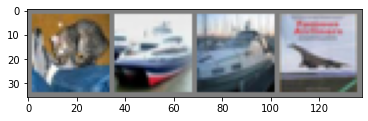

GroundTruth:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 55 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 64 %
Accuracy of   car : 72 %
Accuracy of  bird : 38 %
Accuracy of   cat : 35 %
Accuracy of  deer : 67 %
Accuracy of   dog : 39 %
Accuracy of  frog : 65 %
Accuracy of horse : 53 %
Accuracy of  ship : 66 %
Accuracy of truck : 53 %


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)

cuda:0


In [ ]:
# GPU 사용 설정
use_cuda = True
if use_cuda and torch.cuda.is_available():
    Net().cuda()

In [ ]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [ ]:
inputs, labels = data[0].to(device), data[1].to(device) #epoch의 inputs와 prediction의 images, labels를 대체해야 하는 부분

## VGG19 따라가보기

cifar10 dataset tutorial

https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html


VGG Model Source Code

https://github.com/pytorch/vision/blob/5339e63148304ce32fd1cbd1e8bb74ea79458691/torchvision/models/vgg.py#L94

CIFAR10 DATASET의 특징:

10개의 class :'plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

크기는 32x32, 채널은 3개의 채널

학습 데이터 : 50000개

테스트 데이터: 10000개

In [ ]:
!pip install torchinfo
from torchinfo import summary
from torchvision import models

vgg = models.vgg19()
summary(vgg, (100, 3, 32, 32)) 
#VGG19에 (3, 32, 32) 크기의 이미지를 8개의 batch를 통하여 feedforward 하였을 때의 상태를 요약
#이 CIFAR10 데이터 셋은 32x32의 그림이 3채널로 구성되어 있다.(그림데이터는 원래 3채널-> RGB)

Layer (type:depth-idx)                   Output Shape              Param #
VGG                                      --                        --
├─Sequential: 1-1                        [100, 512, 1, 1]          --
│    └─Conv2d: 2-1                       [100, 64, 32, 32]         1,792
│    └─ReLU: 2-2                         [100, 64, 32, 32]         --
│    └─Conv2d: 2-3                       [100, 64, 32, 32]         36,928
│    └─ReLU: 2-4                         [100, 64, 32, 32]         --
│    └─MaxPool2d: 2-5                    [100, 64, 16, 16]         --
│    └─Conv2d: 2-6                       [100, 128, 16, 16]        73,856
│    └─ReLU: 2-7                         [100, 128, 16, 16]        --
│    └─Conv2d: 2-8                       [100, 128, 16, 16]        147,584
│    └─ReLU: 2-9                         [100, 128, 16, 16]        --
│    └─MaxPool2d: 2-10                   [100, 128, 8, 8]          --
│    └─Conv2d: 2-11                      [100, 256, 8, 8]          29

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.RandomCrop(32, padding=4),
     transforms.RandomHorizontalFlip(),
     transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2023, 0.1994, 0.2010))])

batch_size = 100

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
from typing import Union, List, Dict, Any, cast

In [ ]:
class VGG_custom(nn.Module):

    def __init__(
        self,
        features: nn.Module,
        num_classes: int = 10,
        init_weights: bool = True
    ) -> None:
        super(VGG_custom, self).__init__()
        self.features = features
        self.avgpool = nn.AdaptiveAvgPool2d((3, 3))
        self.classifier = nn.Sequential(
            nn.Linear(512 * 3 * 3, 1000),
            nn.ReLU(True),
            nn.Dropout(p=0.2),
            nn.Linear(1000, 500),
            nn.ReLU(True),
            nn.Dropout(p=0.2),
            nn.Linear(500, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self) -> None:
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)


In [ ]:
cfgs : Dict[str, List[Union[str, int]]] = {
    'E':[64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512, 512, 512, 'M', 512, 512, 512, 512, 'M'],}

In [ ]:
def make_layers(cfg: List[Union[str, int]], batch_norm: bool = False) -> nn.Sequential:
    layers: List[nn.Module] = []
    in_channels = 3
    for v in cfg:
        if v == 'M':
            layers += [nn.MaxPool2d(kernel_size=2, stride=2)]
        else:
            v = cast(int, v)
            conv2d = nn.Conv2d(in_channels, v, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(v), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = v
    return nn.Sequential(*layers)

In [ ]:
def _vgg(arch: str, cfg: str, batch_norm: bool, pretrained: bool, progress: bool, **kwargs: Any) -> VGG_custom:
    if pretrained:
        kwargs['init_weights'] = False
    model = VGG_custom(make_layers(cfgs[cfg], batch_norm=batch_norm), **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model

In [ ]:
def vgg19_custom(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> VGG_custom:
    r"""VGG 19-layer model (configuration "E")
    `"Very Deep Convolutional Networks For Large-Scale Image Recognition" <https://arxiv.org/pdf/1409.1556.pdf>`_.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _vgg('vgg19', 'E', True, pretrained, progress, **kwargs)

In [ ]:
import torch.optim as optim
vgg_cu = vgg19_custom() #신경망
criterion = nn.CrossEntropyLoss() #손실함수
optimizer = optim.Adam(vgg_cu.parameters()) #최적화함수

In [ ]:
!pip install torchinfo
from torchinfo import summary
from torchvision import models

summary(vgg_cu, (10, 3, 32, 32)) #신경망 모델 확인하기

Layer (type:depth-idx)                   Output Shape              Param #
VGG_custom                               --                        --
├─Sequential: 1-1                        [10, 512, 1, 1]           --
│    └─Conv2d: 2-1                       [10, 64, 32, 32]          1,792
│    └─BatchNorm2d: 2-2                  [10, 64, 32, 32]          128
│    └─ReLU: 2-3                         [10, 64, 32, 32]          --
│    └─Conv2d: 2-4                       [10, 64, 32, 32]          36,928
│    └─BatchNorm2d: 2-5                  [10, 64, 32, 32]          128
│    └─ReLU: 2-6                         [10, 64, 32, 32]          --
│    └─MaxPool2d: 2-7                    [10, 64, 16, 16]          --
│    └─Conv2d: 2-8                       [10, 128, 16, 16]         73,856
│    └─BatchNorm2d: 2-9                  [10, 128, 16, 16]         256
│    └─ReLU: 2-10                        [10, 128, 16, 16]         --
│    └─Conv2d: 2-11                      [10, 128, 16, 16]         147,

### Deprecate

**cpu로 하면 너무 느리다!!**

40분을 했는데도 학습이 진행 안됬었음.

In [ ]:
for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data
        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = vgg_cu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

In [ ]:
PATH = './cifar_vgg_cu.pth'
torch.save(vgg_cu.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

### with gpu

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# CUDA 기기가 존재한다면, 아래 코드가 CUDA 장치를 출력합니다:

print(device)

cuda:0


In [ ]:
vgg_cu.to(device)

VGG_custom(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(1

In [ ]:
for epoch in range(10):   # 데이터셋을 수차례 반복합니다.
    print('epoch:',epoch)
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to(device), data[1].to(device)
        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = vgg_cu(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 100 == 99:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

epoch: 0
[1,   100] loss: 0.637
[1,   200] loss: 0.648
[1,   300] loss: 0.633
[1,   400] loss: 0.645
[1,   500] loss: 0.628
epoch: 1
[2,   100] loss: 0.582
[2,   200] loss: 0.585
[2,   300] loss: 0.600
[2,   400] loss: 0.581
[2,   500] loss: 0.601
epoch: 2
[3,   100] loss: 0.561
[3,   200] loss: 0.549
[3,   300] loss: 0.557
[3,   400] loss: 0.558
[3,   500] loss: 0.561
epoch: 3
[4,   100] loss: 0.519
[4,   200] loss: 0.523
[4,   300] loss: 0.522
[4,   400] loss: 0.537
[4,   500] loss: 0.515
epoch: 4
[5,   100] loss: 0.496
[5,   200] loss: 0.482
[5,   300] loss: 0.502
[5,   400] loss: 0.491
[5,   500] loss: 0.499
epoch: 5
[6,   100] loss: 0.459
[6,   200] loss: 0.466
[6,   300] loss: 0.478
[6,   400] loss: 0.461
[6,   500] loss: 0.465
epoch: 6
[7,   100] loss: 0.448
[7,   200] loss: 0.455
[7,   300] loss: 0.448
[7,   400] loss: 0.455
[7,   500] loss: 0.435
epoch: 7
[8,   100] loss: 0.420
[8,   200] loss: 0.419
[8,   300] loss: 0.436
[8,   400] loss: 0.427
[8,   500] loss: 0.428
epoch: 8

In [ ]:
PATH = './cifar_vgg_cu_20.pth'
torch.save(vgg_cu.state_dict(), PATH)

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = vgg_cu(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 85 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = vgg_cu(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 88 %
Accuracy of   car : 93 %
Accuracy of  bird : 68 %
Accuracy of   cat : 76 %
Accuracy of  deer : 87 %
Accuracy of   dog : 81 %
Accuracy of  frog : 90 %
Accuracy of horse : 90 %
Accuracy of  ship : 81 %
Accuracy of truck : 100 %
